# Price Prediction for Second Hand Cars in Germany

## Contents

1-EDA (Exploratory Data Analysis)

  1-2-Feature Engineering

2-Modeling 

  2-0-Splitting the Data Set
  
  2-1-Linear Regression
  
  2-2-Decision Tree
  
  2-3-Bagging
  
  3-4-AdaBoost
  
  2-5-K-Nearest Neighbours
  
  2-6-Random Forest
  
3-Conclusion

  3-1-Summary

  3-2-Model Comparison
  
  3-3-Recommendations and Future Work

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time
from IPython.display import display

## 1-EDA (Exploratory Data Analysis)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [2]:
selected_df = pd.read_csv('final_car_data.csv')

In [3]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
89723,2023,28988,75.0,10.0,0
89724,2023,29077,81.0,1869.0,0
89725,2023,28780,75.0,10.0,0
89726,2023,28788,81.0,5.0,0


In [7]:
selected_df.describe

<bound method NDFrame.describe of        year  price  power_kw  mileage_in_km  brand
0      2011   9900     103.0       119000.0      2
1      2011   9290     118.0       184574.0      2
2      2011   9499      77.0       114860.0      2
3      2011  11990     103.0       205013.0      2
4      2011  10900     150.0       192350.0      2
...     ...    ...       ...            ...    ...
89723  2023  28988      75.0           10.0      0
89724  2023  29077      81.0         1869.0      0
89725  2023  28780      75.0           10.0      0
89726  2023  28788      81.0            5.0      0
89727  2023  28420      81.0         4900.0      0

[89728 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [8]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.02000e+03 9.60000e+01 1.66900e+04 3.00000e+00]
 [2.02100e+03 8.10000e+01 2.57020e+04 3.00000e+00]
 [2.01500e+03 1.10000e+02 1.20000e+05 5.00000e+00]
 ...
 [2.01400e+03 7.70000e+01 2.40521e+05 0.00000e+00]
 [2.01200e+03 2.30000e+02 3.54500e+05 2.00000e+00]
 [2.01600e+03 1.10000e+02 1.38000e+05 4.00000e+00]]
[[2.0160e+03 6.6000e+01 1.3200e+05 0.0000e+00]
 [2.0170e+03 9.0000e+01 5.6802e+04 1.0000e+00]
 [2.0150e+03 9.2000e+01 1.3700e+05 5.0000e+00]
 ...
 [2.0130e+03 5.1000e+01 1.7450e+05 3.0000e+00]
 [2.0200e+03 7.0000e+01 2.0700e+04 7.0000e+00]
 [2.0190e+03 8.5000e+01 5.3935e+04 7.0000e+00]]
[17490 16420 11000 ...  7000  8800 14990]
[17900 23990 11880 ...  5500 17390 18480]


### 2-1-Linear Regression

In [12]:
%run regression.ipynb
out = linear_reg(X_train, y_train)
print('Cross-Validation Error Metrics:')
display(out[1])

Cross-Validation Error Metrics:


,MAE,medAE,R2
0,2900.38,2394.6,0.64


In [13]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression: Actual vs. Predicted Prices')
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 1000x600 with 0 Axes>

In [14]:
# Linear Regression After Scaling
out = linear_reg_scaled(X_train, y_train)
print('Cross-Validation Error Metrics (Scaled):')
display(out[1])

Cross-Validation Error Metrics (Scaled):


,MAE,medAE,R2
0,0.46,0.38,0.64


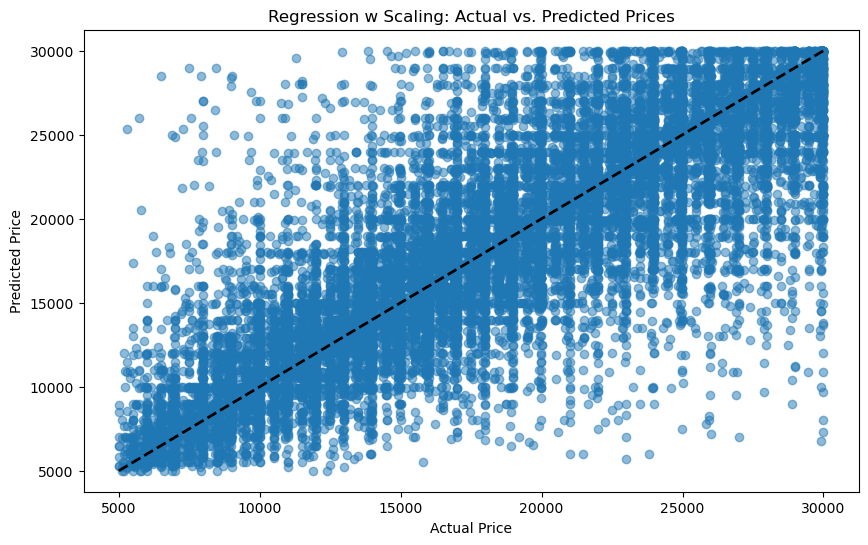

In [34]:
# Plotting scaled version of y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression w Scaling: Actual vs. Predicted Prices')
plt.show()

#### Conclusion

The results seem quite satisfactory; scaling does not change errors much.

 ###  2-2-Decision Tree

In [15]:
%run Decision_Tree.ipynb

#Measuring Execution Time
import time
start_time = time.time()

#dc_tree = decision_tree(X_train, y_train, X_test,y_test)
dtree_model, cv_errors = decision_tree(X_train, y_train, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

# Print or display the cross-validation error metrics
print('Cross-Validation Error Metrics (Decision Tree):')
display(cv_errors)

# Predict on the test set
y_pred = dtree_model.predict(X_test)

Cross-Validation Error Metrics (Decision Tree):


,MAE,medAE,R2
0,2840.44,2002.8,0.6


Error Metrics for the Test Set (Decision Tree):


,MAE,medAE,R2
0,2799.77,2000.0,0.62


Cross-Validation Error Metrics (Decision Tree):


,MAE,medAE,R2
0,2842.72,2001.2,0.61


#### Conclusion.

-The errors are similar to the linear regression model.

-Execution time depends on the parameters as expected. 

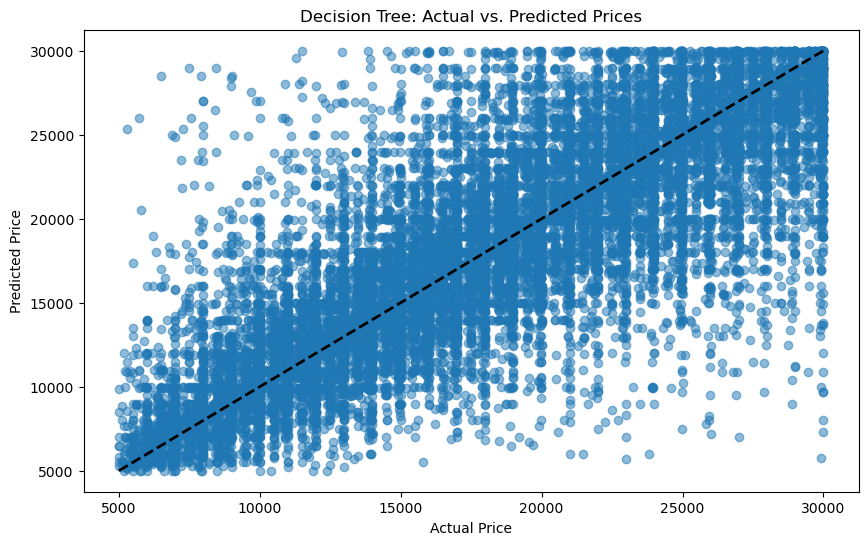

In [16]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs. Predicted Prices')
plt.show()

#### Note. 
Plotting Decision tree causes kernel fail and restart; This is because of the large size of the decision tree.

## 2-3-Bagging

In [19]:
%run Bagging.ipynb
import time

start_time = time.time()

estimator_range = [2, 4, 6, 8]  # estimator range selection
out = bagging(X_train, y_train, estimator_range, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
print('Cross-Validation Error Metrics (Bagging Regressor):')
display(out[1])


Execution Time:  112.33605194091797
Cross-Validation Error Metrics (Bagging Regressor):


NameError: name 'df_errors' is not defined

#### Note. accuracy increases as the estimator increases. The errors look satisfactory.
For larger estimators we run out of memory below.

In [67]:
"""
start_time = time.time()

estimator_range = [10,12] #estimator range selection
out = bagging(X_train,X_test,y_train,y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('accuracy score list: ',out[0])
print('Execution Time: ',execution_time)
"""

"\nstart_time = time.time()\n\nestimator_range = [10,12] #estimator range selection\nout = bagging(X_train,X_test,y_train,y_test,estimator_range)\n\nend_time = time.time()\nexecution_time = end_time - start_time\n\nprint('accuracy score list: ',out[0])\nprint('Execution Time: ',execution_time)\n"

In [68]:
# Also trying bagging with out-of-bag option
#setting estimator=12 based on the above computations
# HOWEVER, KERNEL DIES WHEN WE RUN THIS
"""
start_time = time.time()

n_estimators = 12  
out_oob = baggin_w_oob(X_train,X_test,y_train,y_test,estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('accuracy score list: ',out[0])
print('Execution Time: ',execution_time)
"""

"\nstart_time = time.time()\n\nn_estimators = 12  \nout_oob = baggin_w_oob(X_train,X_test,y_train,y_test,estimator_range)\n\nend_time = time.time()\nexecution_time = end_time - start_time\n\nprint('accuracy score list: ',out[0])\nprint('Execution Time: ',execution_time)\n"

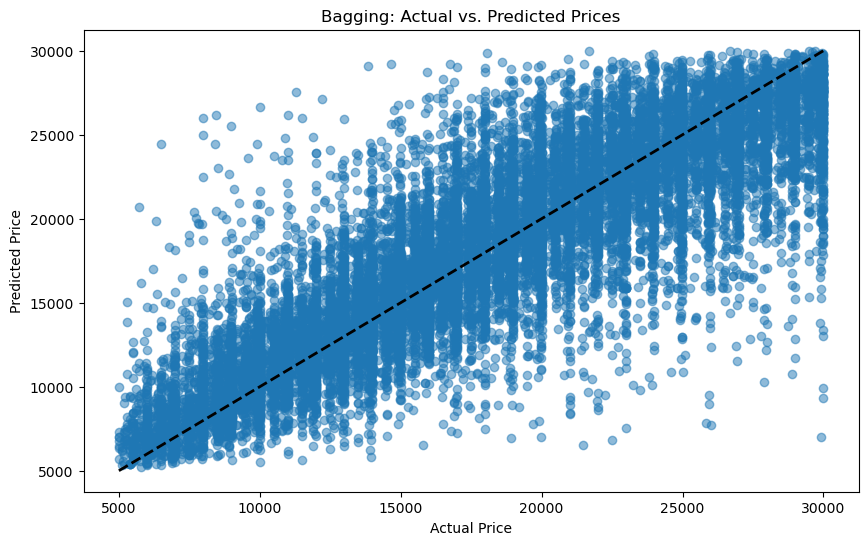

In [14]:
# Plotting y_test and y_pred to understand the spread.
y_pred = out[0]

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Bagging: Actual vs. Predicted Prices')
plt.show()

Note. Visually, Bagging plot seems better than the previous ones.

### 2-4-AdaBoost  w Cross Validation

In [17]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [2, 4, 6, 8]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

Execution Time:  9.462472200393677


,Cross Validation Scores,MAE,medAE,R2
0,1.654698e+07,3301.73,2965.72,0.6
1,1.610225e+07,3301.73,2965.72,0.6
2,1.603114e+07,3301.73,2965.72,0.6
3,1.596263e+07,3301.73,2965.72,0.6
4,1.612855e+07,3301.73,2965.72,0.6


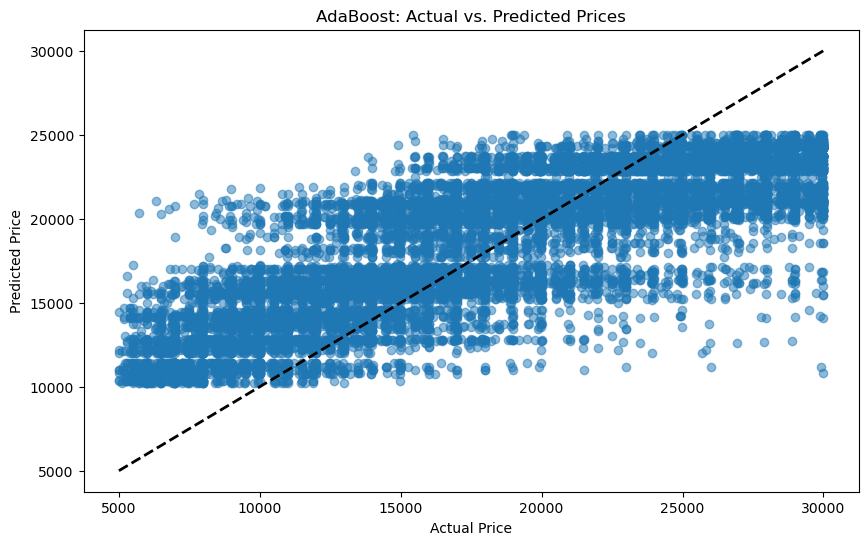

In [87]:
# Plotting y_test and y_pred to understand the spread.
y_pred = out[0]
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('AdaBoost: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. Quite larger errors that previous models

### 2-5-KNN w Cross Validation

In [20]:
%run KNN.ipynb

out = knn_model(X_train, X_test, y_train, y_test)

display(out[1])

ValueError: If using all scalar values, you must pass an index

<Figure size 1400x700 with 0 Axes>

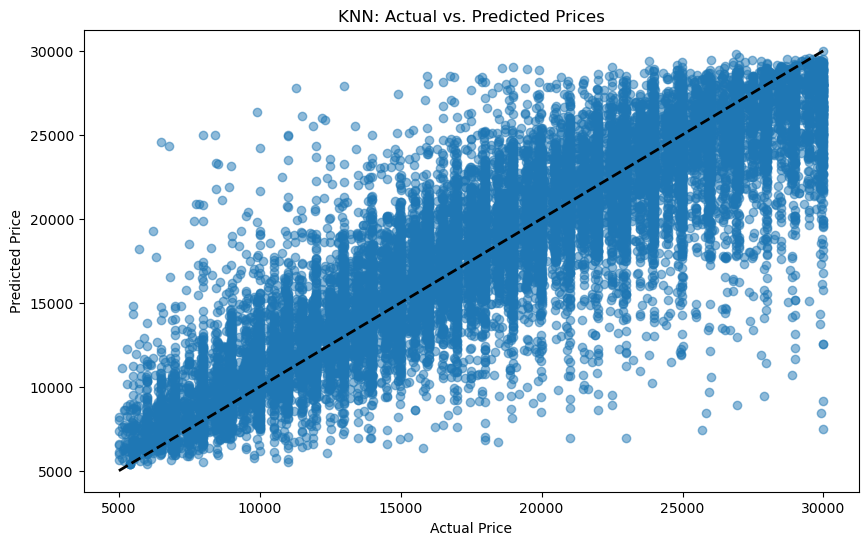

In [89]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, out[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.show()

#### Note. KNN results look quite satisfactory. In particular, it is much better than the other models tried before this. Other than that, 5-fold cross validation used with KNN seems to be a good idea as the data is quite scrapped.

###  2-6-Random Forest w Cross Validation

In [16]:
%run Random_Forest.ipynb

start_time = time.time()

out_rand_forest = random_forest(X_train, X_test, y_train, y_test)

end_time = time.time()
execution_time = end_time - start_time

print("Execution Time: ", execution_time)
display(out_rand_forest[1])

KeyboardInterrupt: 

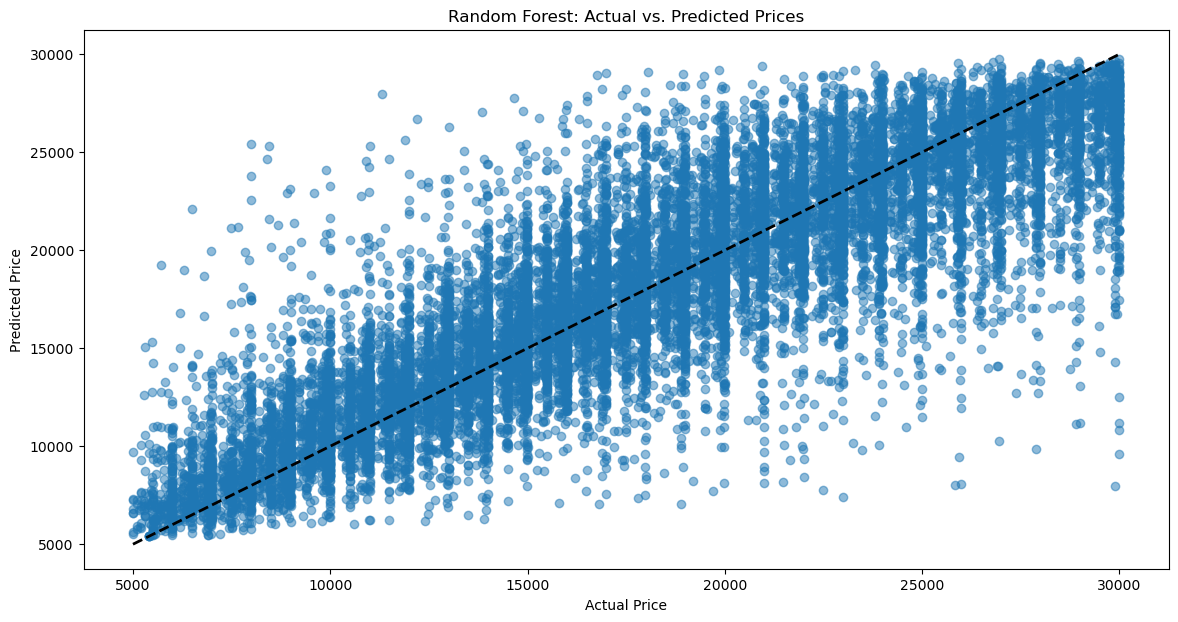

In [68]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(y_test, out_rand_forest[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.show()

#### Note. Random Forest seems to have the best error scores, even better than KNN.